In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('C://Users/dell/Desktop/on going projects/cirrhosis.csv')

In [3]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [5]:
data.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [6]:
data_new = data.drop(['ID', 'N_Days'], axis = 1, inplace = True)

In [7]:
# IDENTIFY CATEGORICAL COLUMNS
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
#ITERATE THROUGH LIST
for column in categorical_columns:
    print(f"Column: {column}")
    print(data[column].value_counts())
    print()

Column: Status
Status
C     232
D     161
CL     25
Name: count, dtype: int64

Column: Drug
Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64

Column: Sex
Sex
F    374
M     44
Name: count, dtype: int64

Column: Ascites
Ascites
N    288
Y     24
Name: count, dtype: int64

Column: Hepatomegaly
Hepatomegaly
Y    160
N    152
Name: count, dtype: int64

Column: Spiders
Spiders
N    222
Y     90
Name: count, dtype: int64

Column: Edema
Edema
N    354
S     44
Y     20
Name: count, dtype: int64



In [8]:
#identify numerical columns
numerical_columns = ['N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']

In [25]:
columns_to_fill_cat = ['Drug','Ascites','Hepatomegaly','Spiders']
data[columns_to_fill_cat] = data[columns_to_fill_cat].fillna(data[columns_to_fill_cat].median())


In [26]:
columns_to_fill = ['Bilirubin', 'Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
data[columns_to_fill] = data[columns_to_fill].fillna(data[columns_to_fill].mean())

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Status         418 non-null    int64  
 1   Drug           418 non-null    float64
 2   Age            418 non-null    int64  
 3   Sex            418 non-null    int64  
 4   Ascites        418 non-null    float64
 5   Hepatomegaly   418 non-null    float64
 6   Spiders        418 non-null    float64
 7   Edema          418 non-null    float64
 8   Bilirubin      418 non-null    float64
 9   Cholesterol    418 non-null    float64
 10  Albumin        418 non-null    float64
 11  Copper         418 non-null    float64
 12  Alk_Phos       418 non-null    float64
 13  SGOT           418 non-null    float64
 14  Tryglicerides  418 non-null    float64
 15  Platelets      418 non-null    float64
 16  Prothrombin    418 non-null    float64
 17  Stage          418 non-null    float64
dtypes: float64

In [12]:
def colchange(data):
    data['Sex'] = data['Sex'].replace(['F', 'M'], [0, 1])
    data['Sex'] = pd.to_numeric(data['Sex'])

    data['Ascites'] = data['Ascites'].replace(['N', 'Y'], [0, 1])
    data['Ascites'] = pd.to_numeric(data['Ascites'])

    data['Hepatomegaly'] = data['Hepatomegaly'].replace(['N', 'Y'], [0, 1])
    data['Hepatomegaly'] = pd.to_numeric(data['Hepatomegaly'])

    data['Spiders'] = data['Spiders'].replace(['N', 'Y'], [0, 1])
    data['Spiders'] = pd.to_numeric(data['Spiders'])

    data['Edema'] = data['Edema'].replace(['N', 'S', 'Y'], [0.2, 0.4, 0.6])
    data['Edema'] = pd.to_numeric(data['Edema'])

    data['Drug'] = data['Drug'].replace(['D-penicillamine', 'Placebo'], [0, 1])
    data['Drug'] = pd.to_numeric(data['Drug'])
    return data

data = colchange(data)

data['Status'] =data['Status'].replace(['C', 'CL', 'D'], [0, 1, 2])
data['Status'] = pd.to_numeric(data['Status'])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Status         418 non-null    int64  
 1   Drug           418 non-null    float64
 2   Age            418 non-null    int64  
 3   Sex            418 non-null    int64  
 4   Ascites        418 non-null    float64
 5   Hepatomegaly   418 non-null    float64
 6   Spiders        418 non-null    float64
 7   Edema          418 non-null    float64
 8   Bilirubin      418 non-null    float64
 9   Cholesterol    418 non-null    float64
 10  Albumin        418 non-null    float64
 11  Copper         418 non-null    float64
 12  Alk_Phos       418 non-null    float64
 13  SGOT           418 non-null    float64
 14  Tryglicerides  418 non-null    float64
 15  Platelets      418 non-null    float64
 16  Prothrombin    418 non-null    float64
 17  Stage          418 non-null    float64
dtypes: float64

In [30]:
data

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2,0.0,21464,0,1.0,1.0,1.0,0.6,14.5,261.000000,2.60,156.000000,1718.000000,137.950000,172.000000,190.0,12.2,4.0
1,0,0.0,20617,0,0.0,1.0,1.0,0.2,1.1,302.000000,4.14,54.000000,7394.800000,113.520000,88.000000,221.0,10.6,3.0
2,2,0.0,25594,1,0.0,0.0,0.0,0.4,1.4,176.000000,3.48,210.000000,516.000000,96.100000,55.000000,151.0,12.0,4.0
3,2,0.0,19994,0,0.0,1.0,1.0,0.4,1.8,244.000000,2.54,64.000000,6121.800000,60.630000,92.000000,183.0,10.3,4.0
4,1,1.0,13918,0,0.0,1.0,1.0,0.2,3.4,279.000000,3.53,143.000000,671.000000,113.150000,72.000000,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2,0.0,24472,0,0.0,1.0,0.0,0.2,1.2,369.510563,2.96,97.648387,1982.655769,122.556346,124.702128,174.0,10.9,3.0
414,0,0.0,14245,0,0.0,1.0,0.0,0.2,0.9,369.510563,3.83,97.648387,1982.655769,122.556346,124.702128,180.0,11.2,4.0
415,0,0.0,20819,0,0.0,1.0,0.0,0.2,1.6,369.510563,3.42,97.648387,1982.655769,122.556346,124.702128,143.0,9.9,3.0
416,0,0.0,21185,0,0.0,1.0,0.0,0.2,0.8,369.510563,3.75,97.648387,1982.655769,122.556346,124.702128,269.0,10.4,3.0


In [44]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [32]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

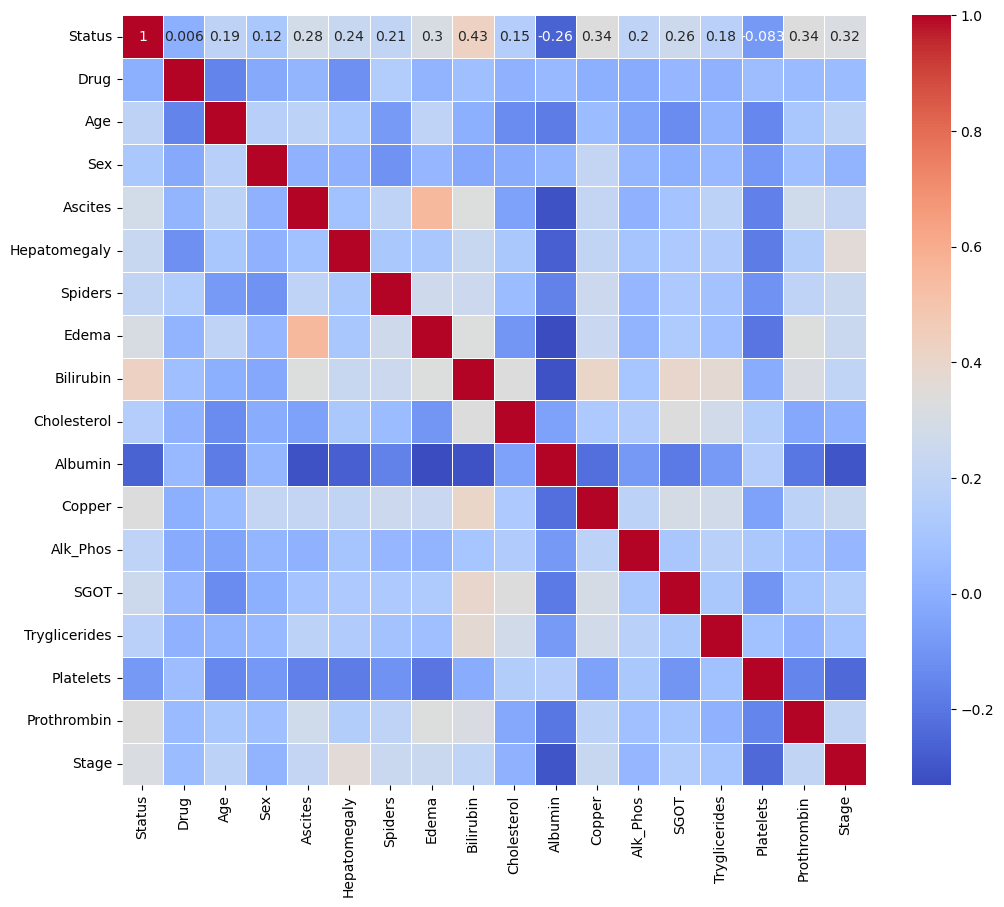

In [33]:
correlation_matrix = data_scaled.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


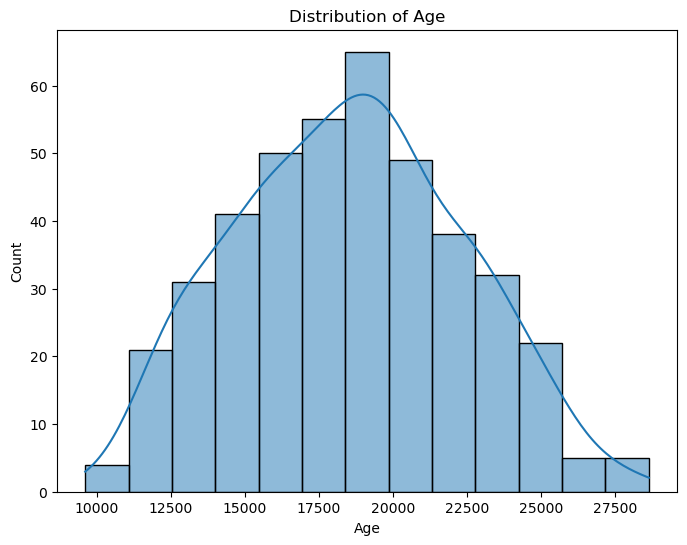

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


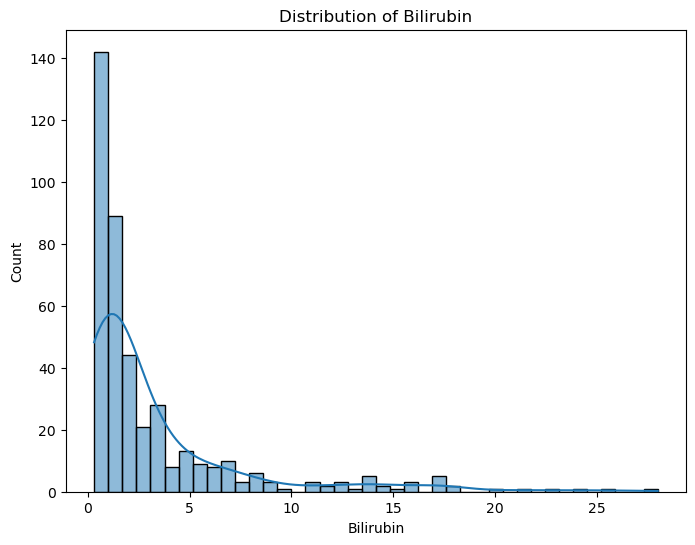

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


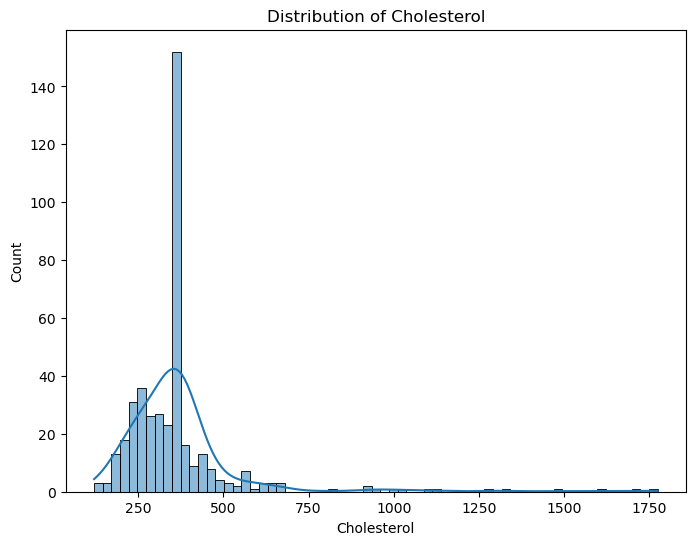

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


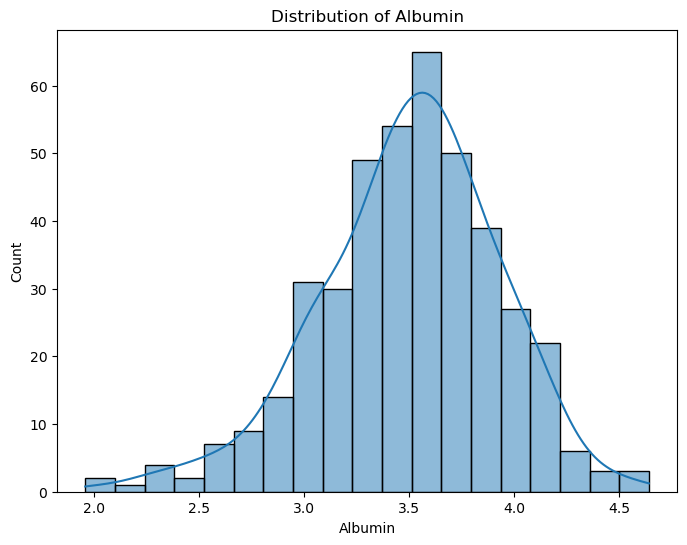

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


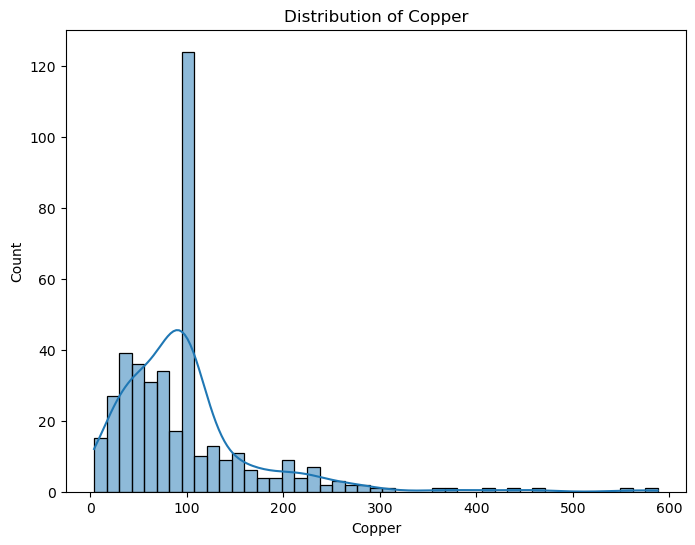

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


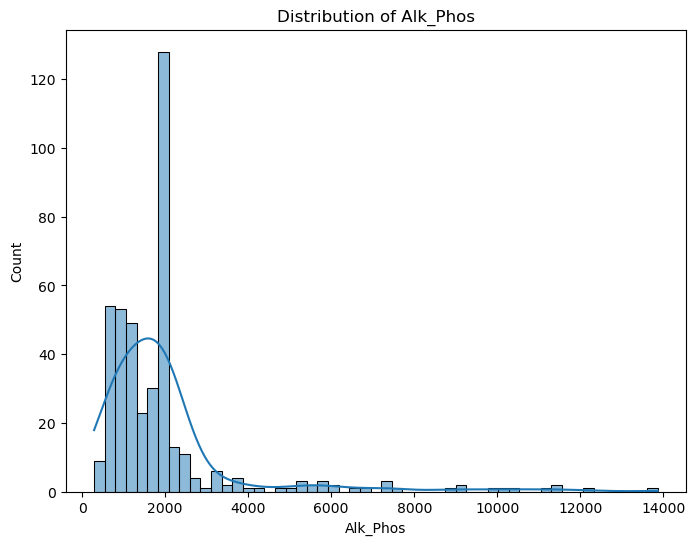

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


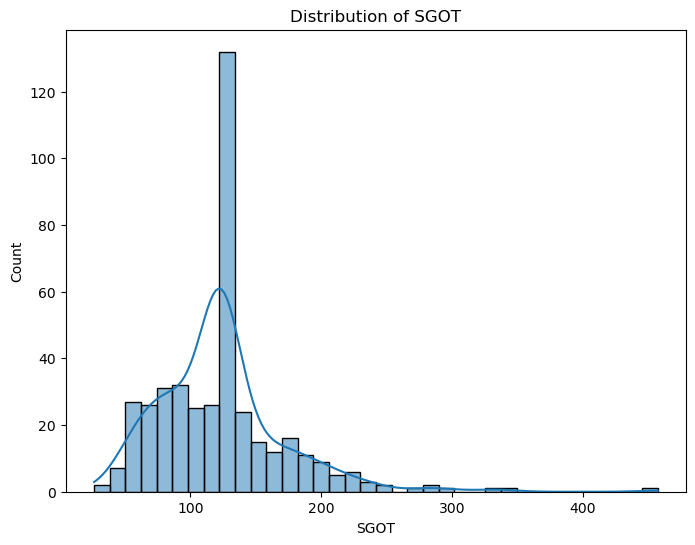

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


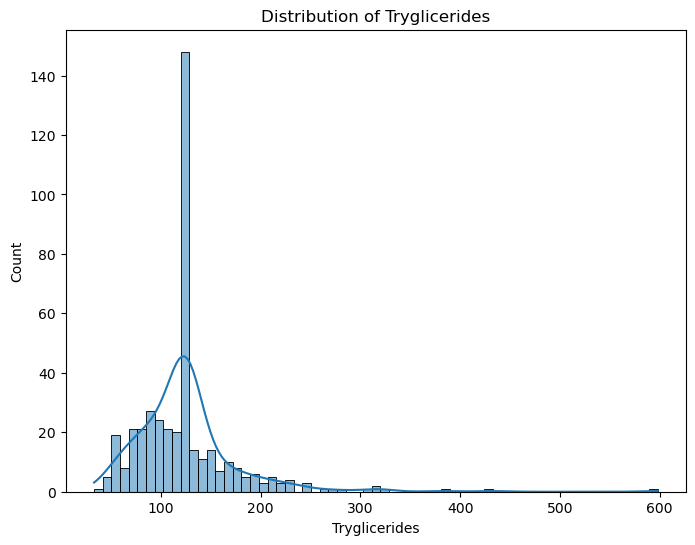

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


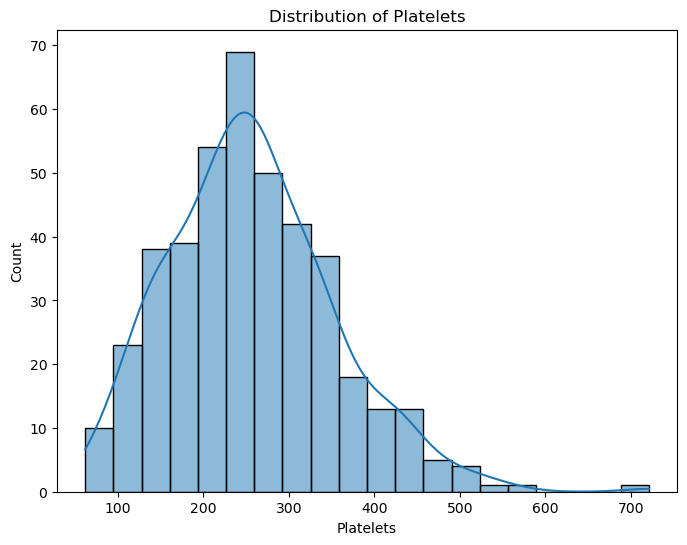

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


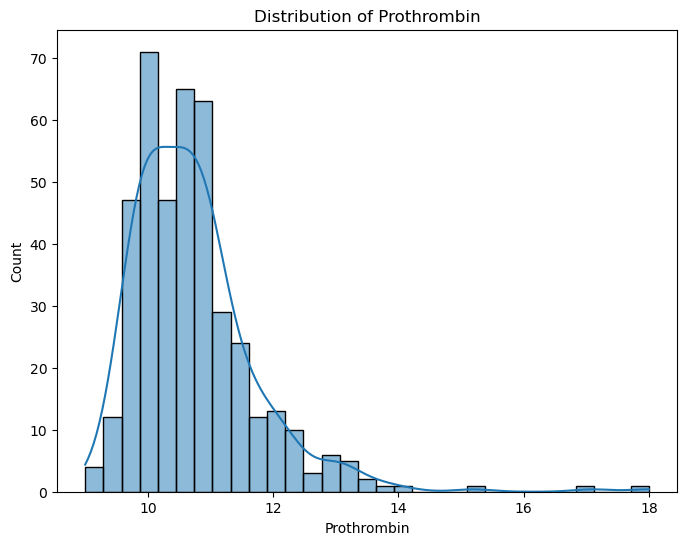

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


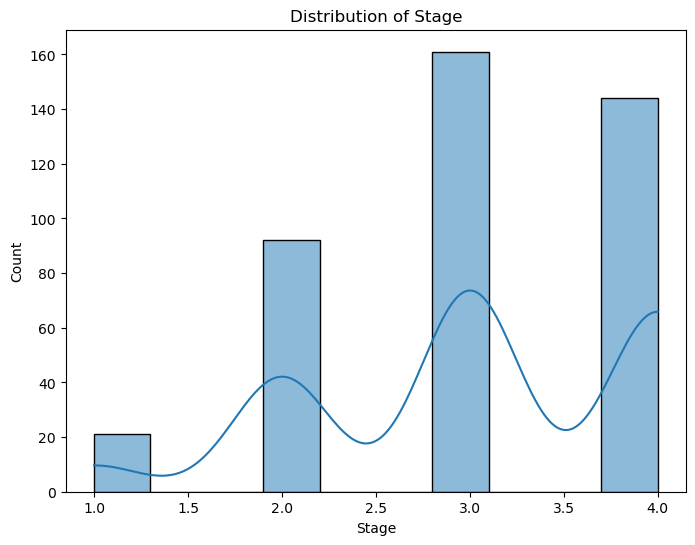

In [35]:
numeric_columns = [ 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

#### Split the Data

In [34]:
X = data.drop(['Status'], axis = 1)
y = data['Status']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state = 42)

In [36]:
## checking distribution of target variable in train test split
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())


Distribution of target variable in training set
Status
0    185
2    129
1     20
Name: count, dtype: int64
Distribution of target variable in test set
Status
0    47
2    32
1     5
Name: count, dtype: int64


In [50]:
# logistic regression

In [51]:
logreg = LogisticRegression()

In [52]:
logreg.fit(X_train, y_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
# Predictions on the test set
prediction_logreg = logreg.predict(X_test)

In [54]:
# Evaluate the model
accuracy = accuracy_score(y_test, prediction_logreg)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, prediction_logreg))

Accuracy: 0.6785714285714286
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.83      0.75        47
           1       0.00      0.00      0.00         5
           2       0.67      0.56      0.61        32

    accuracy                           0.68        84
   macro avg       0.45      0.46      0.45        84
weighted avg       0.64      0.68      0.65        84



C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
import pickle
with open('classification.pkl','wb') as f:
    pickle.dump(logreg, f)